In [2]:
import anndata as ad
import plot

# Load adata

In [3]:
adata = ad.read_h5ad('adata_endofpopidentification.h5ad')

# Bargraphs _(plot.bargraph)_
This plots bargraphs, either for population abundances, or for measured values. Will figure out what plot you want based upon whether you supply a population column (_pop_col_) and/or a value column (_value_col_)

**data** - Can be an AnnData (in which case the adata.obs will be retrieved), a Pandas dataframe, or a path to a _.csv_ which will be loaded as a dataframe

**pop_col** - Column that identifies a population (categorical) column

**value_col** - Column that identifies the result of a measurement 

**hue** - Column to use to subgroup the graph

**hue_order** - List in which to order of hues

**specify_populations** - List of specific populations from pop_col to plot, by default will just plot everything

**levels** - The levels at which the data is structured, by default will average over ROIs

**mean_over** - At what level you want to calculate a mean, by default will average over ROIs

**confidence_interval** - Confidence interval, by default is 68 which is standard error

**crosstab_normalize** - Whether, and how, to normalize crosstab results

**cells_per_mm** - Normalises values by mm2 taken from the sample dataframe stored in adata.uns['sample']

**palette** - Will colour based on values stored in adata.uns if no colour map supplied

**rotate_x_labels** - Angle of x labels, 90 degrees by default.

**return_data** - Will return the dataframe used to create the figure, useful for doing statistics on!


No colour map found for Growth
Population counts


,Case,ROI,Growth,population,Cells
0,MAN005,MAN005.1,Growing,CD4+ TEM cells,132.0
1,MAN005,MAN005.1,Growing,CD68+ TAMs,3.0
2,MAN005,MAN005.1,Growing,CD8+ TEM cells,59.0
3,MAN005,MAN005.1,Growing,Erythrocytes,45.0
4,MAN005,MAN005.1,Growing,M1-like TAMs,166.0
...,...,...,...,...,...
565,MAN66,MAN66.5,Growing,Schwann cells,704.0
566,MAN66,MAN66.5,Growing,T-cells,2.0
567,MAN66,MAN66.5,Growing,Transitioning monocytes,28.0
568,MAN66,MAN66.5,Growing,Vasculature,100.0


Saving raw data: Figures\Barcharts\Raw\Bargraph_population_CaseROIGrowth_CaseROIGrowth.csv
Saving figure: Figures\Barcharts\Bargraph_population_CaseROIGrowth_CaseROIGrowth.png
Saving figure: Figures\Barcharts\Bargraph_population_CaseROIGrowth_CaseROIGrowth.svg


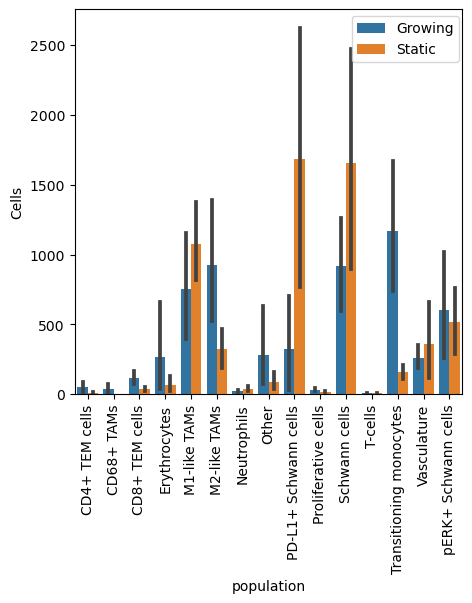

In [31]:
data = plot.bargraph(adata,
                     hue='Growth',
                     pop_col='population',
                     return_data=True)

# Stats _(plot.mlm_stats)_
Conducts a mixed linear model analysis on the given pandas DataFrame for each unique entry in the 'pop_col' column. This is the best practice for where we have measurments (e.g. population abundances) from several ROIs from the same Case. Rather than just taking an average over the ROIs, this uses the variability over the ROIs in the analysis, and generally have more power. This function can also be used where we have cell-level metrics we want to compare between conditions, in which case each cell measurment is nested within ROI, which is nested with Case.

By default, it also runs a t-test to compare against.

As we are running several models in parallel (one for each population), we correct the p values for multiple comparisons. By default, this is using the 'holm-sidak', but you can also do Benjamini/Hochberg with 'fdr_bh'

There are several other ways to customise this, view them by running __plot.mlm_stats?__

**Data** - a pandas DataFrame containing the data, this can be generated most easily using the _plot.bargraph_ function

**pop_col** - the name of the column that identifies different populations

**group_col** - the name of the column that identifies 2 groups

**value_col** - the name of the column that contains the values to be analyzed (default 'Cells')

**method** - method used to correct for multiple comparisons (default 'holm-sidak'). Can also do Benjamini/Hochberg with 'fdr_bh'.

**Returns:** a pandas DataFrame containing the p-values of the mixed linear model analysis and, if 'run_t_tests' is True, t-test for each population, both raw and corrected for multiple comparisons. If 'show_t_values' is True, the t-values from the t-test will also be included.


In [54]:
plot.mlm_stats(data, 
          pop_col='population',
          group_col='Growth')

,population,mlm_p_value,mlm_warnings,t_test_p_value,mlm_p_value_corrected,t_test_p_value_corrected
0,CD4TEMcells,0.499099,[],0.087668,0.974940,0.558406
1,CD68TAMs,0.232637,[],0.040128,0.929204,0.372061
2,CD8TEMcells,0.163316,[],0.008074,0.882310,0.100030
3,Erythrocytes,0.401404,[],0.312929,0.972462,0.846888
4,M1likeTAMs,0.593483,[],0.240945,0.974940,0.808733
5,M2likeTAMs,0.137249,[],0.038034,0.858021,0.372061
6,Neutrophils,0.241362,['Maximum Likelihood optimization failed to co...,0.186459,0.929204,0.764140
7,Other,0.358746,"['Random effects covariance is singular', 'Ran...",0.359755,0.971408,0.846888
8,PDL1Schwanncells,0.211736,[],0.007339,0.926989,0.097986
9,Proliferativecells,0.130149,[],0.050884,0.858021,0.406813
